In [1]:
import sys
sys.path.append("/home/scro4068/miniconda3/envs/prolif/lib/python3.12/site-packages/")

In [2]:
from rdkit import Chem
import prolif as plf
import MDAnalysis as mda
import numpy as np
import pandas as pd

In [3]:
def create_vector(index):
    #rdkit_prot = Chem.MolFromPDBFile(f'../dataset/refined-set/{index}/protein_h.pdb')
    #rdkit_protein_mol = plf.Molecule(rdkit_prot)
    u = mda.Universe(f'../dataset/refined-set/{index}/protein_h.pdb')
    prot = u.select_atoms('protein')
    rdkit_protein_mol = plf.Molecule.from_mda(prot)
    ligand_file = str(f'../dataset/refined-set/{index}/ligand_h.sdf')
    ligand_mol = plf.sdf_supplier(ligand_file)[0]
    # Define the fingerprint generator with a set of consistent interaction types
    interaction_types = ['Hydrophobic', 'HBDonor', 'HBAcceptor', 'PiStacking', 'Anionic', 'Cationic', 'CationPi', 'PiCation', 'VdWContact']

    fpgen = plf.Fingerprint(interaction_types, count=True)

    # Generate the interaction fingerprint
    fingerprint = fpgen.run_from_iterable([ligand_mol], rdkit_protein_mol)

    # Convert the generated fingerprint to a DataFrame
    df = fpgen.to_dataframe()  # No argument is passed here
    df_T = df.T
    df_flat = df_T.droplevel(0, axis=0)
    df_flat = df_flat.reset_index()
    #keep only the first three letters from protein
    df_flat['residue'] = df_flat['protein'].str[:3]
    df_flat
    amino_acids = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']
    vector = np.zeros((len(amino_acids),len(interaction_types)))
    for i in range(vector.shape[0]):
        for j in range(vector.shape[1]):
            if interaction_types[j] in df_flat['interaction'].values and amino_acids[i] in df_flat['residue'].values:
                vector[i,j] = df_flat[(df_flat['interaction'] == interaction_types[j]) & (df_flat['residue'] == amino_acids[i])][0].sum()
    
    return vector

In [3]:
features = pd.read_csv('../BFE_ML/feature_calc/features.csv', comment='#', sep=',')

In [4]:
features

,Molecular weight,Acceptors,Donors,LogP,Molecular Refractivity,Wiener index,Ids,PD_amide,PD_positive,PD_neutral,PD_heteroatom,PD_OH,PA_amide,PA_negative,PA_neutral,PA_aromatic,Free energy,P_logp,P_MR
0,231.170319,2.0,3.0,-0.13160,60.5356,461.0,2tpi,24.0,0.0,0.0,0.0,5.0,23.0,5.0,4.0,1.0,-5.874825,-0.665612,29.440791
1,147.112804,2.0,3.0,-0.85160,36.0603,130.0,4tln,6.0,9.0,4.0,0.0,2.0,6.0,6.0,4.0,7.0,-5.072544,-0.403714,34.962933
2,363.057999,10.0,6.0,-2.56970,76.4808,1230.0,1rnt,9.0,6.0,6.0,0.0,3.0,9.0,9.0,10.0,7.0,-7.070675,-0.619947,36.111405
3,182.081170,2.0,3.0,-0.37020,46.1227,268.0,4ts1,11.0,4.0,5.0,1.0,4.0,12.0,11.0,10.0,5.0,-6.727787,-0.498970,31.695033
4,519.213437,5.0,5.0,3.26060,135.1412,4249.0,4tmn,16.0,9.0,5.0,1.0,6.0,16.0,13.0,10.0,9.0,-13.859616,-0.503965,34.127585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,253.050394,3.0,2.0,1.21620,64.9371,478.0,6d1i,6.0,9.0,5.0,0.0,0.0,5.0,4.0,2.0,8.0,-5.577268,-0.570889,33.634874
5312,212.025563,3.0,1.0,0.53470,50.5625,260.0,6uh0,5.0,7.0,6.0,1.0,3.0,6.0,5.0,5.0,8.0,-8.272838,-0.393956,34.876296
5313,404.151622,6.0,1.0,4.72902,114.4347,2134.0,6k04,10.0,2.0,2.0,1.0,2.0,9.0,3.0,4.0,4.0,-10.960875,-0.186890,36.583310
5314,436.991713,8.0,5.0,0.42410,89.9438,1701.0,6ic2,8.0,7.0,6.0,1.0,3.0,10.0,4.0,4.0,8.0,-8.229820,-0.330392,33.531504


In [5]:
indices = features['Ids']

In [7]:
'''vectorlist = []
with open('vectors.csv', 'w') as f:
    f.write('index,vector\n')
    for index in indices:
        createdvector= create_vector(index).flatten()
        vectorlist.append(createdvector)
        #append to file after each iteration
        f.write(f'{index},{createdvector}\n')
'''

"vectorlist = []\nwith open('vectors.csv', 'w') as f:\n    f.write('index,vector\n')\n    for index in indices:\n        createdvector= create_vector(index).flatten()\n        vectorlist.append(createdvector)\n        #append to file after each iteration\n        f.write(f'{index},{createdvector}\n')\n"

In [53]:
Y = features['Free energy']

In [21]:
#Read vectors.csv
vector_csv = []
index_list = []
with open('vectors.csv', 'r') as f:
    n = 0
    for line in f:
        if n == 0:
            n+=1
            continue
        if n == 1:
            vect = ""
            spl = line.split(',')
            index_list.append(spl[0])
            vect += spl[1][1:-2]+'.'
            n+=1
            continue            
        if "," in line:
            vector_csv.append(vect)
            vect = ""
            spl = line.split(',')
            index_list.append(spl[0])
            vect += spl[1][1:-2]+"."
            n+=1
        else:
            vect += line[1:-2]+"."
            n+=1
    vector_csv.append(vect)


In [22]:
vector_clean = []
for j in range(len(vector_csv)):
    tmp = []
    for i,v in enumerate(vector_csv[j].split('.')[:-2]):
        try:
            tmp.append(int(v))
        except:
            try:
                tmp.append(int(v[1:]))
            except:
                print(v)
                tmp.append(int(v[2:]))
    vector_clean.append(tmp)

In [23]:
len(vector_clean)

5315

In [9]:
import gc

In [40]:
#Continue from the last written index
start = index_list[-1]
print(start)
start_idx = np.where(indices == start)[0][0]
print(start_idx, indices[start_idx+1])
skip = '4o09'
for index in indices[start_idx+1:]:
    f = open('vectors.csv', 'a')
    if index == skip:
        f.write(f"{skip}, [NaN]\n")
        continue
    createdvector = create_vector(index).flatten()

    #append to file after each iteration
    f.write(f'{index},{createdvector}\n')
    f.close()
    #empty the memory
    del createdvector
    gc.collect()
#f.close()

6ic2
5314 6gxe


NameError: name 'create_vector' is not defined

In [24]:
vector_fixed = []
n = 0
for item in vector_clean: 
    if len(item) < 180:
        vector_fixed.append([np.NaN] * 180)
        print("NaN")
        n+=1
    else:
        vector_fixed.append(item)
print(n)

NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
103


In [25]:
#Make a dictionary with the index as key and the vector as value
vector_dict = dict(zip(index_list, vector_fixed))


In [26]:
vector_df   = pd.DataFrame(vector_dict).T


In [27]:
#iterate over vector_df rows and get the index of the row
#Then get the corresponding index from the features dataframe and get the free energy
#Then append the free energy to a list
Y = []
for i in range(vector_df.shape[0]):
    index = vector_df.index[i]
    Y.append(features[features['Ids'] == index]['Free energy'].values[0])

In [28]:
vector_df['Free energy'] = Y

In [29]:
vector_df.dropna(inplace=True)

In [31]:
#Make all columns integers
vector_df.astype(int)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Free energy
2tpi,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-5
4tln,0,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,-5
1rnt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-7
4ts1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-6
4tmn,0,1,0,0,0,0,0,0,3,0,...,4,0,0,0,0,0,0,0,0,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6r4k,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,-6
6d1i,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,1,-5
6uh0,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,1,-8
6k04,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,3,-10


In [32]:
#make the index column a column called ID
vector_df['ID'] = vector_df.index

In [33]:
vector_df

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Free energy,ID
2tpi,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.874825,2tpi
4tln,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.072544,4tln
1rnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.070675,1rnt
4ts1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.727787,4ts1
4tmn,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.859616,4tmn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6r4k,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-6.911863,6r4k
6d1i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-5.577268,6d1i
6uh0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.272838,6uh0
6k04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-10.960875,6k04


In [34]:
vector_df.to_csv('interaction_vectors.csv', index=False)

# Start running from here


In [1]:
#import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#NN
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, History
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

import kerastuner as kt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
#import adam
from keras.optimizers import Adam

warnings.filterwarnings('ignore')

2024-12-20 09:04:45.903936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-20 09:04:45.968576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-20 09:04:45.988260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 09:04:46.091726: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-20 09:04:47.138043: W tensorflow/compiler/tf2

In [2]:
vector_df = pd.read_csv('interaction_vectors.csv')

In [3]:
#make columns 0 to 179 integers
for i in range(180):
    vector_df[str(i)] = vector_df[str(i)].astype(int)
vector_df

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Free energy,ID
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.874825,2tpi
1,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,-5.072544,4tln
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-7.070675,1rnt
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-6.727787,4ts1
4,0,1,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,-13.859616,4tmn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,-6.911863,6r4k
5208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-5.577268,6d1i
5209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-8.272838,6uh0
5210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,-10.960875,6k04


In [4]:
#training & scaling
X = vector_df.drop(['Free energy'], axis=1)
X=X.drop(['ID'], axis=1)
Y = vector_df['Free energy']
y_scaled = StandardScaler().fit_transform(Y.values.reshape(-1, 1))
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=0)

In [5]:
#SVM 
svm_preds = {}
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')
svr_lin.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

svm_preds['linear_svr_pred'] = svr_lin.predict(X_test)
svm_preds['rbf_svr_pred'] = svr_rbf.predict(X_test)
svm_preds['poly_svr_pred'] = svr_poly.predict(X_test)
print("SVM")
print("Linear SVR R2:", r2_score(y_test, svm_preds['linear_svr_pred']))
print("RBF SVR R2:", r2_score(y_test, svm_preds['rbf_svr_pred']))
print("Poly SVR R2:", r2_score(y_test, svm_preds['poly_svr_pred']))
print("Linear SVR MSE:", mean_squared_error(y_test, svm_preds['linear_svr_pred']))
print("RBF SVR MSE:", mean_squared_error(y_test, svm_preds['rbf_svr_pred']))
print("Poly SVR MSE:", mean_squared_error(y_test, svm_preds['poly_svr_pred']))


SVM
Linear SVR R2: 0.29266594667888346
RBF SVR R2: 0.44228994776476804
Poly SVR R2: 0.24884315086808229
Linear SVR MSE: 0.7176227495742116
RBF SVR MSE: 0.5658223568780018
Poly SVR MSE: 0.762082980318255


In [6]:
#LR (Linear Regression)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

logit = LinearRegression()
logit.fit(X_train, y_train)
y_test_pred = logit.predict(X_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))

Mean Squared Error: 5.179308224839261e+25
R2 Score: -5.105051480389415e+25


In [7]:
#RF
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))



Mean Squared Error: 0.5885187421038164
R2 Score: 0.41991896500671266


In [8]:
#XGboost
model = XGBRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))


Mean Squared Error: 0.5550047839865915
R2 Score: 0.45295242701994465


In [14]:
NN_model = Sequential()
NN_model.add(Dense(192, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(192, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(192, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(1, activation='linear'))
NN_model.compile(optimizer =Adam(learning_rate=0.0001), loss = 'mse')

In [15]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.0939 - val_loss: 0.8025
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9203 - val_loss: 0.7635
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8860 - val_loss: 0.7467
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7755 - val_loss: 0.7203
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7744 - val_loss: 0.7144
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7441 - val_loss: 0.6957
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7211 - val_loss: 0.6904
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7419 - val_loss: 0.6920
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6859 - val_loss: 0.6623
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6808 - val_loss: 0.6624
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6831 - val_loss: 0.6509
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

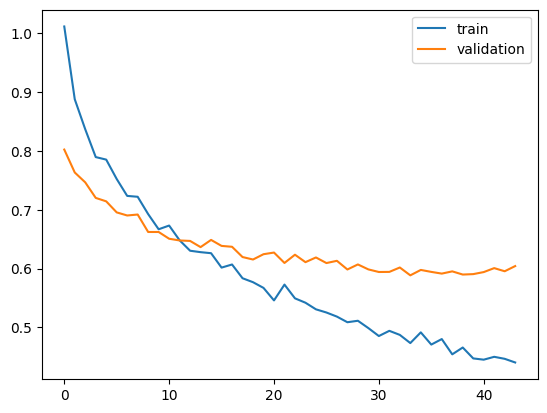

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [17]:
y_test_pred = NN_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error: 0.587518627619037
R2 Score: 0.42090474065655636


In [21]:
#Keras tuning
def build_model(hp):
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
    units_per_layer = hp.Int('units_per_layer', min_value=32, max_value=512, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.4,step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model = Sequential()
    for i in range(num_layers):
        model.add(Dense(units=units_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

In [22]:
obj = kt.Objective('val_loss', direction='min')
tuner = kt.RandomSearch(build_model, objective=obj, max_trials=500, executions_per_trial=1,
                               project_name="Hyper tuning", directory="tuning_interaction")

In [23]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Trial 12 Complete [00h 00m 11s]
val_loss: 0.5710603594779968

Best val_loss So Far: 0.5506630539894104
Total elapsed time: 00h 01m 50s

Search: Running Trial #13

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_layers
384               |352               |units_per_layer
0                 |0.2               |dropout_rate
0.01              |0.0001            |learning_rate

Epoch 1/100
89/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7193

: 

: 

: 

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(best_hps.values)

In [ ]:
NN_modeltuned = Sequential()
NN_modeltuned.add(Dense(192, input_dim=X_train.shape[1], activation='relu'))
NN_modeltuned.add(Dropout(0.2))
NN_modeltuned.add(Dense(192, activation='relu'))
NN_modeltuned.add(Dropout(0.2))
NN_modeltuned.add(Dense(192, activation='relu'))
NN_modeltuned.add(Dropout(0.2))
NN_modeltuned.add(Dense(1, activation='linear'))
NN_modeltuned.compile(optimizer =Adam(learning_rate=0.0001), loss = 'mse')

In [ ]:
callbacks = [ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True), EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

In [ ]:
history = NN_modeltuned.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=callbacks)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
print('Best validation loss:', np.min(history.history['val_loss']), np.argmin(history.history['val_loss']))
plt.legend()
plt.show()

In [ ]:
NN_modeltuned.load_weights('best_model.keras')

In [ ]:
y_pred = NN_modeltuned.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))